In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1

In [2]:
##TASK 1

#to read and separate the data in to columns:
t = pd.read_table("temp_data.txt", skiprows=15, sep="\s+")

# drop the unnecessary columns:
t_new= t.drop(["#STAID","SOUID"], axis=1)

#drop the incomplete year:
t_new = t_new[t_new.DATE < 20210000]

# change the values from 0.1 T to 1 T values.
t_new['TG'] = (t_new['TG'] / 10) 

# change the date format:
t_new["DATE"] = pd.to_datetime(t_new["DATE"], format="%Y%m%d", errors="raise")

#drop the missing valued rows:
t_new2 = t_new[t_new.Q_TG != 9]

#change the indices into Date to make analysis easier:
t_new2.index = t_new2["DATE"]
#then, drop the date column also:
t_new2 = t_new2.drop(["DATE"], axis = 1)

t_new2

,TG,Q_TG
DATE,,
1756-01-01,-8.7,0
1756-01-02,-9.2,0
1756-01-03,-8.6,0
1756-01-04,-7.7,0
1756-01-05,-7.2,0
...,...,...
2020-12-27,4.2,0
2020-12-28,4.2,0
2020-12-29,4.4,0


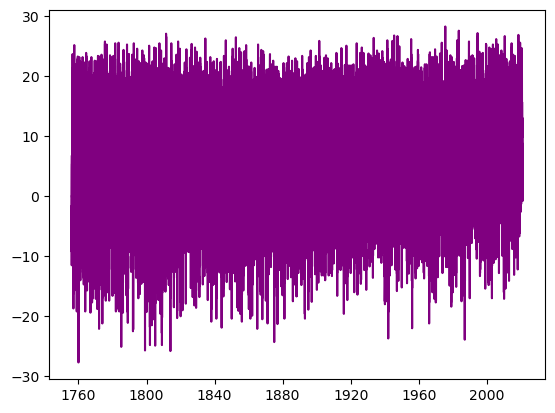

In [3]:
plt.plot(t_new2, color = "purple")


       TG  Q_TG
DATE           
1756 -8.7     0
1756 -9.2     0
1756 -8.6     0
1756 -7.7     0
1756 -7.2     0
...   ...   ...
1765 -5.8     0
1765 -6.4     0
1765 -9.0     0
1765 -3.7     0
1765 -5.7     0

[3653 rows x 2 columns]
       TG  Q_TG
DATE           
2011 -2.3     0
2011 -3.6     0
2011 -6.9     0
2011 -6.6     0
2011 -1.2     0
...   ...   ...
2020  4.2     0
2020  4.2     0
2020  4.4     0
2020  2.8     0
2020  3.7     0

[3653 rows x 2 columns]


<Axes: xlabel='DATE'>

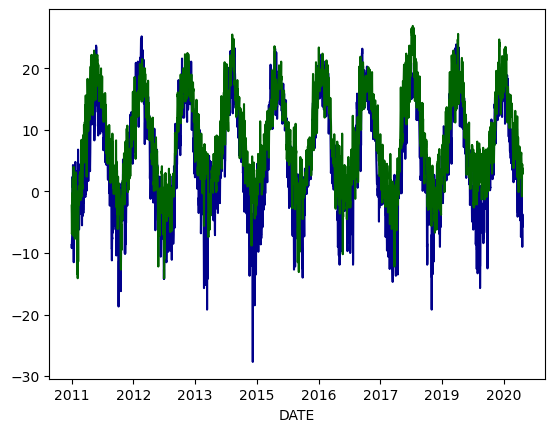

In [4]:
# limit analysis to 1756-1765 (first 10 years):
tf10 = t_new2["1756":"1765"].copy()
tf10.index = tf10.index.strftime("%Y")
print(tf10)



# limit analysis to 2010-2029 (last 10 years):
tl10 = t_new2["2011":"2020"].copy()
tl10.index = tl10.index.strftime("%Y")
print(tl10)


tf10["TG"].plot(color = "darkblue")
tl10["TG"].plot(color = "darkgreen")


### Task 2

In [5]:
#minimum and maximum value of the temperature over all data points:

Tmin = min(t_new2.TG)
Tmax = max(t_new2.TG)
print("Minimum: " + str(Tmin) + " and maximum: " + str(Tmax))

Tmax_date = t_new2.TG.idxmax()
Tmin_date = t_new2.TG.idxmin()


print("Minimum temperature occured at: " + str(Tmin_date.strftime("%Y-%m-%d")) + " and maximum temperature occured at: " + str(Tmax_date.strftime("%Y-%m-%d")))

# empirical mean and variance value:
Tmean = np.mean(t_new2.TG)
Tvar = np.var(t_new2.TG)

#round the values into 2 decimal points:
Tmean_2 = round(Tmean,2)
Tvar_2 = round(Tvar,2)

print("Mean temperature value: " + str(Tmean_2) + " and variance: " + str(Tvar_2))

Minimum: -27.7 and maximum: 28.3
Minimum temperature occured at: 1760-01-07 and maximum temperature occured at: 1975-08-07
Mean temperature value: 6.21 and variance: 70.2


                 mean
DATE                 
1756-01-31  -2.612903
1756-02-29  -0.786207
1756-03-31  -0.632258
1756-04-30   0.683333
1756-05-31   5.245161
...               ...
2020-08-31  19.135484
2020-09-30  14.113333
2020-10-31   9.387097
2020-11-30   6.893333
2020-12-31   4.029032

[3180 rows x 1 columns]


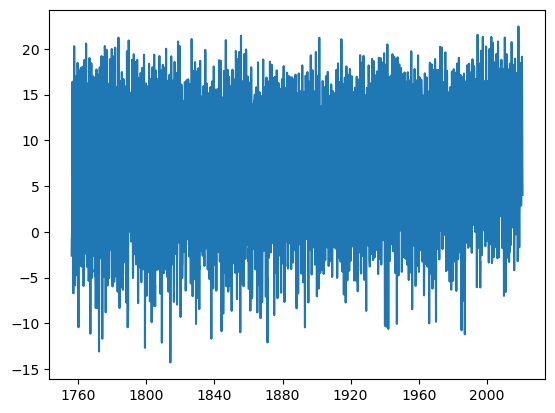

             TG  Q_TG
DATE                 
1756-01-01 -8.7     0
1756-01-02 -9.2     0
1756-01-03 -8.6     0
1756-01-04 -7.7     0
1756-01-05 -7.2     0
...         ...   ...
2020-12-27  4.2     0
2020-12-28  4.2     0
2020-12-29  4.4     0
2020-12-30  2.8     0
2020-12-31  3.7     0

[96790 rows x 2 columns]
                  var
DATE                 
1756-01-31  21.659828
1756-02-29   8.374803
1756-03-31  10.454925
1756-04-30   4.793161
1756-05-31   8.020559
...               ...
2020-08-31  10.148366
2020-09-30   2.107402
2020-10-31   9.320495
2020-11-30  11.221333
2020-12-31   4.050796

[3180 rows x 1 columns]
1802-01-31 00:00:00
76.25599999999999


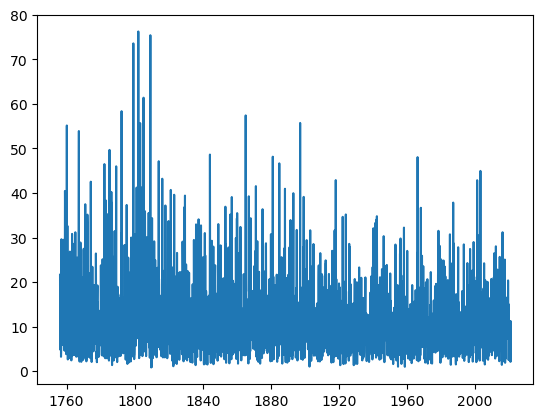

In [6]:
## mean and variance over months of the data:
t_mean_m = t_new2.resample('M')['TG'].agg(["mean"])
print(t_mean_m)

plt.plot(t_mean_m)
plt.show()

t_var_m = t_new2.resample('M')['TG'].agg(["var"])


print(t_new2)
print(t_var_m)
print(t_var_m["var"].idxmax())
print(max(t_var_m["var"]))

plt.plot(t_var_m)
plt.show()

             TG  Q_TG
DATE                 
1756-12-01  2.4     0
1756-12-02  1.1     0
1756-12-03 -0.6     0
1756-12-04 -6.2     0
1756-12-05 -5.1     0
...         ...   ...
2020-12-27  4.2     0
2020-12-28  4.2     0
2020-12-29  4.4     0
2020-12-30  2.8     0
2020-12-31  3.7     0

[8215 rows x 2 columns]
                mean
DATE                
1756-12-31 -2.367742
1757-12-31 -2.658065
1758-12-31 -4.738710
1759-12-31 -5.203226
1760-12-31 -2.345161
...              ...
2016-12-31  2.200000
2017-12-31  1.516129
2018-12-31  0.806452
2019-12-31  3.012903
2020-12-31  4.029032

[265 rows x 1 columns]


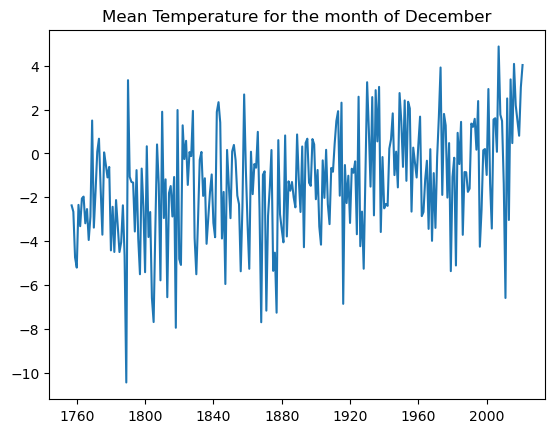

                  var
DATE                 
1756-12-31   8.521591
1757-12-31  10.631183
1758-12-31  40.464452
1759-12-31  12.332989
1760-12-31  20.636559
...               ...
2016-12-31   9.334667
2017-12-31   3.702731
2018-12-31   7.723957
2019-12-31   7.743161
2020-12-31   4.050796

[265 rows x 1 columns]


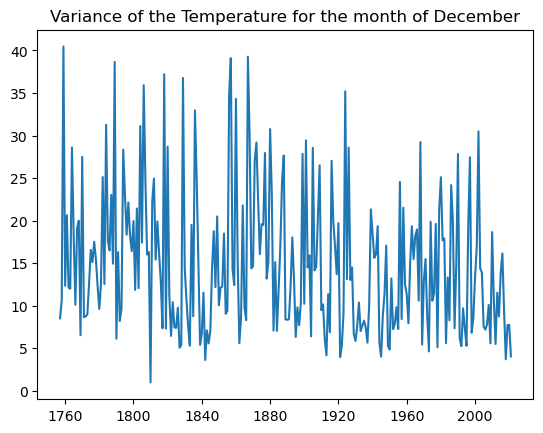

In [7]:
### mean and varince for 1 month only plot:
## for ex. December month for all years in the dataset:

t_dec=t_new2[(t_new2.index.month==12)]

print(t_dec)

t_dec_mean = t_dec.resample('M')['TG'].agg(["mean"])

t_dec_mean = t_dec_mean.dropna()
print(t_dec_mean)

plt.plot(t_dec_mean)
plt.title("Mean Temperature for the month of December")
plt.show()

t_dec_var = t_dec.resample('M')['TG'].agg(["var"])
t_dec_var = t_dec_var.dropna()
print(t_dec_var)

plt.plot(t_dec_var)
plt.title("Variance of the Temperature for the month of December")
plt.show()

In [9]:
#TASK 3:

# We analyse the change in time with temperature with different components:
# x_t = a_t + p_t + n_t

# where a_t is the moving averages over years 
# and p_t is the periodic change
# and lastly, n_t is for the fast fluctuations.

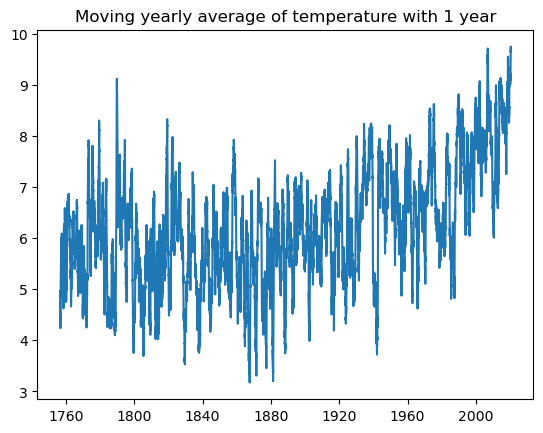

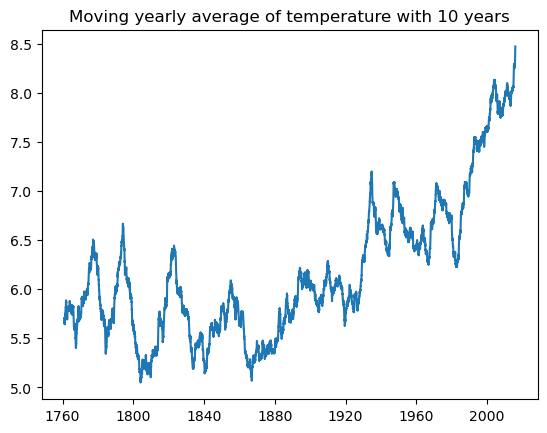

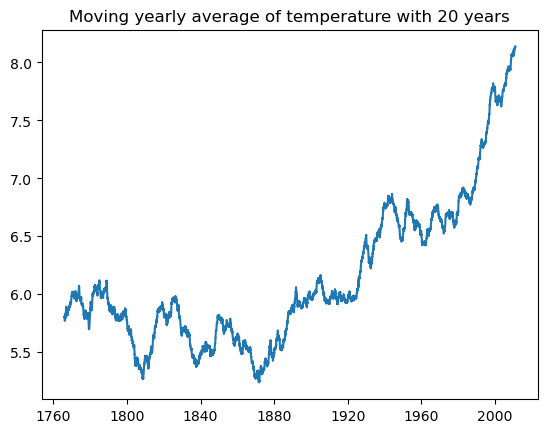

In [10]:
# Starting with the a_t component:

# Moving temperature averages for 1 year and 5 years:

t_year_mean = t_new2.resample('Y')['TG'].agg(['mean'])

M1 = 365
M10 = 10 * 365
M20 = 20 * 365

#1 year
t_mean_MA1 = t_new2["TG"].rolling(window=M1, center=True).mean()
plt.plot(t_mean_MA1)
plt.title("Moving yearly average of temperature with 1 year")
plt.show()

#10 year
t_mean_MA10 = t_new2["TG"].rolling(window=M10, center=True).mean()
plt.plot(t_mean_MA10)
plt.title("Moving yearly average of temperature with 10 years")
plt.show()

#20 year
t_mean_MA20 = t_new2["TG"].rolling(window=M20, center=True).mean()
plt.plot(t_mean_MA20)
plt.title("Moving yearly average of temperature with 20 years")
plt.show()

#I did the task for moving average but now, lets do it with the summation series provided in the task sheet.


#1 year
t_MA1 = t_year_mean["mean"].rolling(window=1).mean()

#10 year
t_MA10 = t_year_mean["mean"].rolling(window=10).mean()
#20 year
t_MA20 = t_year_mean["mean"].rolling(window=20).mean()

In [8]:
t_y = t_new2.resample('Y')['TG'].agg(['mean'])
print(t_y)


M1 = 1
M10 = 10
M20 = 20

# First array are indices, the second are means.
m1_val = [[], []]
m10_val = [[], []]
m20_val = [[], []]

# Minima and maxima in the data
min = pd.Timestamp(1756, 1, 1)
max = pd.Timestamp(2020, 12, 31)


for index, row in t_y.iterrows():
    
    sum1 = 0
    sum10 = 0
    sum20 = 0
    
    # If time periods are out of the data these become false.
    m10_boo = True
    m20_boo = True
    
    # The endpoints of the time period in the current index.
    m1_min = (index - pd.DateOffset(months=6)).replace(hour=0)
    m1_max = (index - pd.DateOffset(months=-6)).replace(hour=0)

    m10_min = index - pd.DateOffset(years=M10/2)
    m10_max = index - pd.DateOffset(years=-M10/2)
    
    m20_min = index - pd.DateOffset(years=M20/2)
    m20_max = index - pd.DateOffset(years=-M20/2)

    # If m1 is out of range no need to check others.
    if m1_min < min or m1_min > max:
        continue
    # m10 range check
    elif m10_min < min or m10_max > max:
        m10_boo = False
        m20_boo = False
    # m20 range check
    elif m20_min < min or m20_max > max:
        m20_boo = False
    
    # Assign start and end points according to the widest range.
    if m20_boo:
        start = m20_min
        end = m20_max
    elif m10_boo:
        start = m10_min
        end = m10_max
    else:
        start = m1_min
        end = m1_max
    
    print(start, end)
    print(index)


    # Sum the values from start to end.
    for i in pd.date_range(start, end):
        if not i.is_year_end:
            continue

        # This may need to be reformatted.
        if i >= m1_min and i <= m1_max:
            sum1 += t_y.loc[i]["mean"]
        
        if i >= m10_min and i <= m10_max:
            sum10 += t_y.loc[i]["mean"]
        
        if i >= m20_min and i <= m20_max:
            sum20 += t_y.loc[i]["mean"]
    
    # Index accoring to the middle date.
    m1_val[0].append(m1_min + (m1_max - m1_min) / 2)

    m1_val[1].append(sum1 / M1)

    if m20_boo:
        m20_val[0].append(m20_min + (m20_max - m20_min) / 2)
        m20_val[1].append(sum20 / M20)
    if m10_boo:
        m10_val[0].append(m10_min + (m10_max - m10_min) / 2)
        m10_val[1].append(sum10 / M10)

        
    


                mean
DATE                
1756-12-31  4.904918
1757-12-31  5.927671
1758-12-31  4.751781
1759-12-31  6.330411
1760-12-31  5.263661
...              ...
2016-12-31  8.170492
2017-12-31  8.003562
2018-12-31  8.895068
2019-12-31  8.603014
2020-12-31  9.721311

[265 rows x 1 columns]
1756-06-30 00:00:00 1757-06-30 00:00:00
1756-12-31 00:00:00
1757-06-30 00:00:00 1758-06-30 00:00:00
1757-12-31 00:00:00
1758-06-30 00:00:00 1759-06-30 00:00:00
1758-12-31 00:00:00
1759-06-30 00:00:00 1760-06-30 00:00:00
1759-12-31 00:00:00
1760-06-30 00:00:00 1761-06-30 00:00:00
1760-12-31 00:00:00
1756-12-31 00:00:00 1766-12-31 00:00:00
1761-12-31 00:00:00
1757-12-31 00:00:00 1767-12-31 00:00:00
1762-12-31 00:00:00
1758-12-31 00:00:00 1768-12-31 00:00:00
1763-12-31 00:00:00
1759-12-31 00:00:00 1769-12-31 00:00:00
1764-12-31 00:00:00
1760-12-31 00:00:00 1770-12-31 00:00:00
1765-12-31 00:00:00
1756-12-31 00:00:00 1776-12-31 00:00:00
1766-12-31 00:00:00
1757-12-31 00:00:00 1777-12-31 00:00:00
176

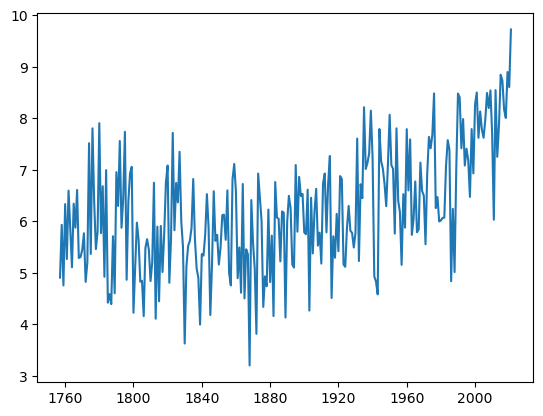

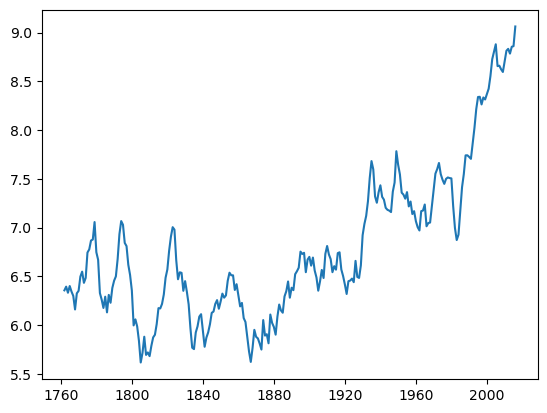

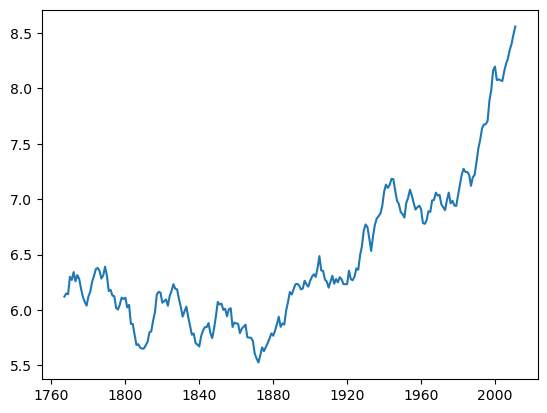

In [9]:
m1df = pd.DataFrame(m1_val[1], index=m1_val[0], columns=["Moving Average"])
plt.plot(m1df)
plt.show()
m10df = pd.DataFrame(m10_val[1], index=m10_val[0], columns=["Moving Average"])
plt.plot(m10df)
plt.show()
m20df = pd.DataFrame(m20_val[1], index=m20_val[0], columns=["Moving Average"])
plt.plot(m20df)
plt.show()


[4.91643836 4.89260274 5.91753425 4.7309589  6.30520548 5.2660274
 6.59917808 5.84876712 5.09534247 6.34109589 5.83671233 6.59287671
 5.28       5.28493151 5.44821918 5.75123288 4.82520548 5.22794521
 7.49068493 5.33643836 7.79178082 6.37945205 5.44       5.76465753
 7.87863014 5.79287671 6.67643836 4.86712329 6.95315068 4.42821918
 4.55123288 4.36109589 5.71643836 4.63452055 6.90958904 6.30794521
 7.53780822 5.89808219 6.42164384 7.72493151 4.83232877 6.40136986
 6.93369863 7.03150685 4.21835616 5.0690411  5.95315068 5.61589041
 4.81369863 4.86630137 4.14712329 5.46821918 5.62410959 5.51041096
 4.79205479 5.19890411 6.74       4.13561644 5.87561644 4.43863014
 5.89726027 5.04684932 5.73178082 6.70493151 7.08       4.80219178
 5.64438356 7.70958904 5.81726027 6.76328767 6.3709589  7.3460274
 5.98986301 5.53452055 3.61726027 5.09945205 5.52       5.62547945
 5.86520548 6.80767123 5.64273973 5.04438356 4.86986301 3.98931507
 5.35287671 5.33863014 5.72       6.52657534 5.85315068 4.235890

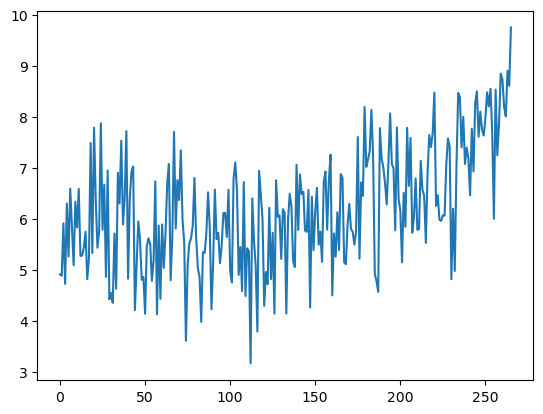

[5.70071233 5.69712329 5.868      5.79865753 5.86150685 5.77194521
 5.82430137 5.64413699 5.58013699 5.81816438 5.71838356 5.91367123
 5.89205479 5.90391781 5.95616438 6.20147945 6.20813699 6.38786301
 6.35621918 6.30536986 6.21394521 5.89249315 5.69542466 5.71816438
 5.59887671 5.51049315 5.55726027 5.64191781 5.73972603 5.68720548
 6.01265753 6.04438356 6.24863014 6.36715068 6.60684932 6.338
 6.21378082 6.05646575 6.03046575 5.86950685 5.58238356 5.51484932
 5.42167123 5.29323288 5.13712329 5.2010137  5.21293151 5.29027397
 5.13939726 5.24736986 5.2039726  5.37991781 5.33265753 5.34273973
 5.46687671 5.69331507 5.65364384 5.54873973 5.90454795 5.8999726
 6.13109589 6.17723288 6.40484932 6.42687671 6.30923288 5.96134247
 5.99134247 5.97764384 5.76945205 5.77460274 5.78208219 5.70375342
 5.47989041 5.37345205 5.21805479 5.38991781 5.41569863 5.43876712
 5.52693151 5.52706849 5.26786301 5.21676712 5.36673973 5.44087671
 5.61561644 5.59419178 5.60986301 5.64668493 5.61309589 5.58846575
 

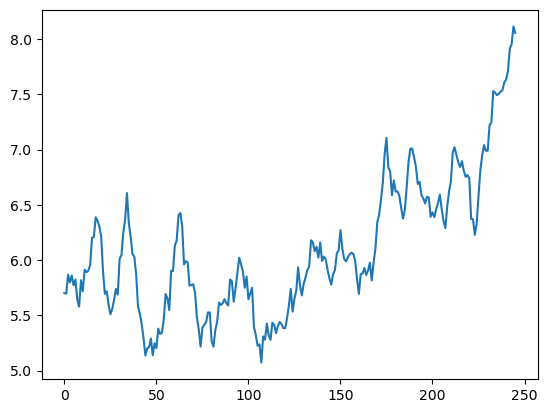

[5.80828767 5.80660274 5.88057534 5.85589041 5.90806849 5.98805479
 6.01572603 6.01660274 5.97042466 6.06442466 5.96715068 5.90406849
 5.79543836 5.8139726  5.77987671 5.85708219 5.88289041 6.02006849
 6.05164384 5.99806849 6.11647945 5.97120548 5.97109589 6.04276712
 6.107      5.92290411 5.88738356 5.84921918 5.88676712 5.77928767
 5.80042466 5.7790411  5.83471233 5.83241096 5.87228767 5.77117808
 5.71516438 5.67580822 5.58591781 5.55964384 5.39394521 5.44850685
 5.37971233 5.31834247 5.30641096 5.44779452 5.43380822 5.41945205
 5.52372603 5.57419178 5.66843836 5.77832877 5.87083562 5.88930137
 5.88794521 5.82883562 5.8249863  5.76357534 5.83760274 5.83671233
 5.95587671 5.94054795 5.94269863 5.90010959 5.76424658 5.67694521
 5.70338356 5.70880822 5.64857534 5.65182192 5.52461644 5.465
 5.42616438 5.40735616 5.41749315 5.49375342 5.51445205 5.54239726
 5.57091781 5.55724658 5.54760274 5.51335616 5.49650685 5.59442466
 5.75013699 5.81034247 5.78582192 5.77517808 5.68013699 5.72212329


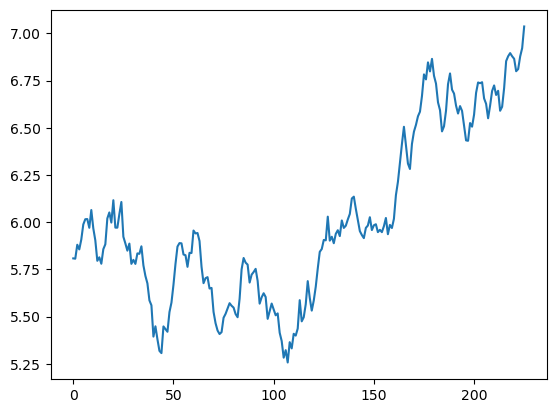

In [11]:
# calculating a_t with the formula in the task sheet:

t_new2 = t_new2[~((t_new2.index.month == 2) & (t_new2.index.day ==29))]
t_year_mean = t_new2.resample('Y')['TG'].agg(['mean'])
numY = len(t_year_mean)

T = 365
M1 = 1
M10 = 10
M20 =20
x = t_new2.TG[0]

sum1 = x
sum10 = x
sum20 = x

range1 = numY/M1 
range10 = numY/M1 -10
range20 = numY/M1 -20

n1 = T*M1
n10 = T*M10
n20 = T*M20

M1val = np.array([])

#MA1 year:
for i in range(1 ,int(n1)):
    sum1 = (sum1 + t_new2.TG[i])
a_t1 = sum1/n1
M1val = np.append(M1val, a_t1)  #first term  
    
for i in range(1, int(range1)+1):
    n1 = T*i
    sumx = t_new2.TG[n1-T]
    for j in range(int(n1-T), int(n1)):
        sumx = (sumx + t_new2.TG[j])
    a_tx = sumx/365
    M1val = np.append(M1val, a_tx)    
    
print(M1val)
plt.plot(M1val)
plt.show()


#MA10 years:
M10val = np.array([])

for i in range(1 ,int(n10)):
    sum10 = (sum10 + t_new2.TG[i])
a_t10 = sum10/n10
M10val = np.append(M10val, a_t10)  #first term  
    
for i in range(10, int(range10)):
    n10 = T*i
    sumx = t_new2.TG[n10-T*M10]
    for j in range(int(n10-T*M10), int(n10)+1):
        sumx = (sumx + t_new2.TG[j])
    a_tx10 = sumx/(365*10)
    M10val = np.append(M10val, a_tx10)
      
print(M10val)
plt.plot(M10val)
plt.show()

#MA20 years:
M20val = np.array([])

for i in range(1 ,int(n20)):
    sum20 = (sum20 + t_new2.TG[i])
a_t20 = sum20/n20
M20val = np.append(M20val, a_t20)  #first term  
    
for i in range(20, int(range20)):
    n20 = T*i
    sumx = t_new2.TG[n20-T*M20]
    for j in range(int(n20-T*M20), int(n20)+1):
        sumx = (sumx + t_new2.TG[j])
    a_tx20 = sumx/(365*20)
    M20val = np.append(M20val, a_tx20)
      
print(M20val)
plt.plot(M20val)
plt.show()



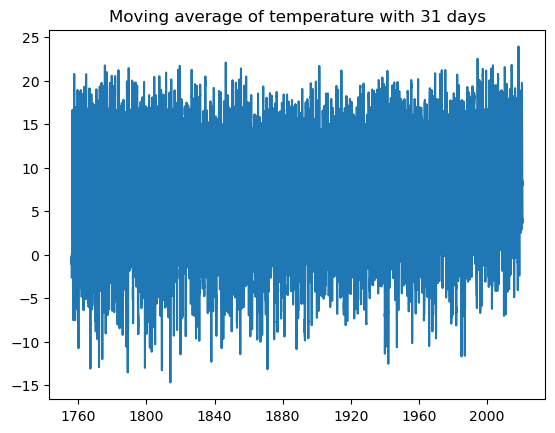

In [10]:
# q_t component:

t_new3 = t_new2.copy()

t_new3["MA"] = t_new3["TG"].rolling(window=31, center=True).mean()

plt.plot(t_new3["MA"])
plt.title("Moving average of temperature with 31 days")
plt.show()

In [12]:
# y_t as a new column
t_new3["y_t"] = t_new3["TG"] - t_new3["MA"]
# z_t as a new column
t_new3["z_t"] = t_new3["y_t"] - t_new3["MA"]

T = 31 # days
t_new3 = t_new3.dropna()
t_new3


,TG,Q_TG,MA,y_t,z_t
DATE,,,,,
1756-01-16,-6.2,0,-2.612903,-3.587097,-0.974194
1756-01-17,-10.0,0,-2.322581,-7.677419,-5.354839
1756-01-18,-11.5,0,-2.161290,-9.338710,-7.177419
1756-01-19,-6.2,0,-2.022581,-4.177419,-2.154839
1756-01-20,0.8,0,-1.880645,2.680645,4.561290
...,...,...,...,...,...
2020-12-12,4.9,0,3.645161,1.254839,-2.390323
2020-12-13,2.9,0,3.741935,-0.841935,-4.583871
2020-12-14,2.2,0,3.841935,-1.641935,-5.483871


In [13]:
S1 = 0
t = 1
for index, row in t_new3.iterrows():
    S1 += t_new3.loc[index]["y_t"] * np.sin(2 * 1 * np.pi * t / T)
    t += 1
S1 *= 2 / t
S1

0.014304906819068193

In [14]:
C1 = 0
t = 1
for index, row in t_new3.iterrows():
    C1 += t_new3.loc[index]["y_t"] * np.cos(2 * 1 * np.pi * t / T)
    t += 1
C1 *= 2 / t
C1

-0.01631722729842621

In [15]:
S2 = 0
t = 1
for index, row in t_new3.iterrows():
    S2 += t_new3.loc[index]["y_t"] * np.sin(2 * 2 * np.pi * t / T)
    t += 1
S2 *= 2 / t
S2

0.023873223137873628

In [16]:
C2 = 0
t = 1
for index, row in t_new3.iterrows():
    C2 += t_new3.loc[index]["y_t"] * np.cos(2 * 2 * np.pi * t / T)
    t += 1
C2 *= 2 / t
C2

-0.04376303452505831

In [17]:
def calc_pt(t, T):
    pt = S1 * np.sin(2 * 1 * np.pi * t / T) \
        + C1 * np.cos(2 * 1 * np.pi * t / T) \
        + S2 * np.sin(2 * 2 * np.pi * t / T) \
        + C2 * np.cos(2 * 2 * np.pi * t / T)
    return pt

In [18]:
t_new3["p_t"] = calc_pt((t_new3.index - t_new3.index[0]).days, T)

# n_t as a new columns
t_new3["n_t"] = t_new3["y_t"] - t_new3["p_t"]
t_new3

,TG,Q_TG,MA,y_t,z_t,p_t,n_t
DATE,,,,,,,
1756-01-16,-6.2,0,-2.612903,-3.587097,-0.974194,-0.060080,-3.527017
1756-01-17,-10.0,0,-2.322581,-7.677419,-5.354839,-0.043905,-7.633514
1756-01-18,-11.5,0,-2.161290,-9.338710,-7.177419,-0.022202,-9.316508
1756-01-19,-6.2,0,-2.022581,-4.177419,-2.154839,0.001967,-4.179387
1756-01-20,0.8,0,-1.880645,2.680645,4.561290,0.025185,2.655460
...,...,...,...,...,...,...,...
2020-12-12,4.9,0,3.645161,1.254839,-2.390323,0.025185,1.229654
2020-12-13,2.9,0,3.741935,-0.841935,-4.583871,0.044215,-0.886151
2020-12-14,2.2,0,3.841935,-1.641935,-5.483871,0.056503,-1.698439


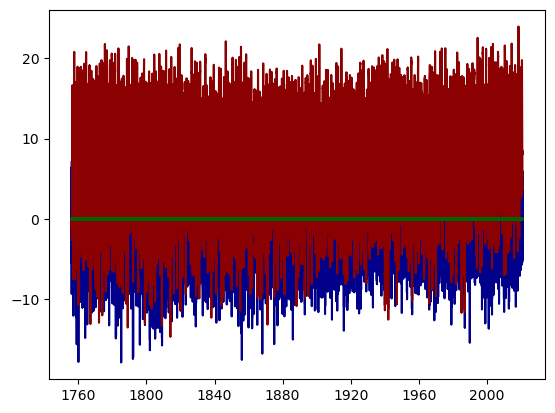

In [19]:
plt.plot(t_new3["y_t"], color="darkblue")
plt.plot(t_new3["MA"], color="darkred")
plt.plot(t_new3["p_t"], color="darkgreen")

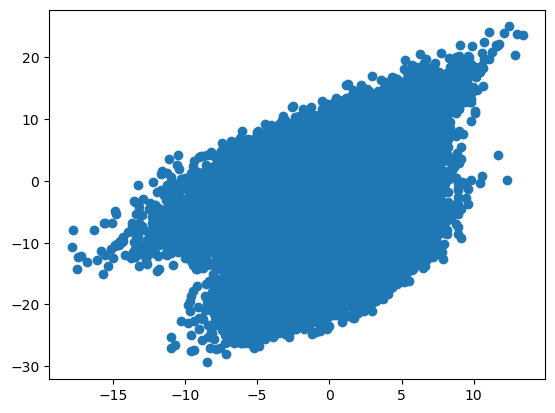

In [20]:
# doğrusu nasıl acaba, bir umut böyle.
plt.scatter(t_new3["n_t"], t_new3["z_t"])

In [21]:
p = t_new3["n_t"].corr(t_new3["z_t"])
p

0.32770242314959097